# Converting Gray Image to HSV and saving it
This Jupyter Notebook to explore if I can Change an image originally in gray scale to HSV and save it in that format so that it can be used in a convolutional neural network with 3 channels
### Author:
Lenin G. Falconi
### Date: 
April 14, 2019

## Read and Plot images from folder
In the next cell we read and plot one of the original images from CBIS DDSM converted from dicom to png. A function to read images from folder is defined. An array of images is returned by pointing to images location and specifying file format

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import os
from tqdm import tqdm



def read_images_from_folder(path, extension):
    '''
    Reads images from location and creates and array
    :param path:
    :param extension:
    :return:
    '''
    cv_img = []
    # image_data = []
    for img in tqdm(glob.glob(path+extension)):
        n = cv2.imread(img, 0)
        # print(np.shape(n))
        # cv_img.append(img.split('/')[-1])
        name = img.split('/')[-1]
        width = np.shape(n)[1]
        height = np.shape(n)[0]
        aspect = width/float(height)
        # The following condition tries to remove images that are very asymetrical
        if (aspect >= 0.4) and (aspect <= 1.5):
            # print('appending image: ', name)
            cv_img.append(n)
        # cv_img.append(np.shape(n))
        # print(name, width, height)
        # image_data.append([name, width, height])
    return cv_img


In [2]:
img_array = read_images_from_folder('./images/', '*.png')

100%|██████████| 6/6 [00:00<00:00, 16.03it/s]


## Image size
Let's print the images sizes and aspect ratio

In [3]:
for counter, img in  enumerate(img_array):
    width = np.shape(img)[1]
    height = np.shape(img)[0]
    aspect = width / float(height)
    print("Image %d size is: %s and aspect ratio is: %f" %(counter, np.shape(img), aspect))

Image 0 size is: (271, 220) and aspect ratio is: 0.811808
Image 1 size is: (515, 431) and aspect ratio is: 0.836893
Image 2 size is: (256, 256) and aspect ratio is: 1.000000
Image 3 size is: (292, 256) and aspect ratio is: 0.876712
Image 4 size is: (275, 284) and aspect ratio is: 1.032727
Image 5 size is: (221, 240) and aspect ratio is: 1.085973


But, read images from folder function changes image to gray Chek this out:

(515, 431, 3)

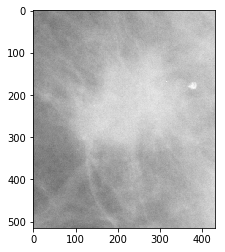

In [4]:
i_temp = cv2.imread('./images/1.png')
plt.imshow(i_temp)
np.shape(i_temp)

## Plotting images
Plotting the same image as above. Notice that for loop in function read from older alters the order. So image 1.png is now at index 2

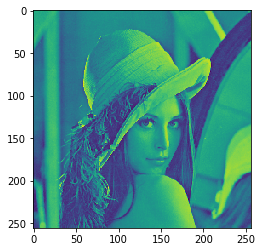

In [5]:
plt.imshow(img_array[2])

Image does not look a like because of the color map, let's change these.

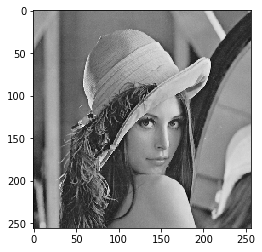

In [6]:
plt.imshow(img_array[2], cmap='gray')

This means that during DICOM conversion image was transformed into a 3 channel image. From that we could probably convert to HSV **This must be checked**

From now on let us suppose we have images like the ones in the img_array which are single channel and Plot the example of index 2

Image 0 size is: (271, 220, 3) and aspect ratio is: 0.811808
Image 1 size is: (515, 431, 3) and aspect ratio is: 0.836893
Image 2 size is: (256, 256, 3) and aspect ratio is: 1.000000
Image 3 size is: (292, 256, 3) and aspect ratio is: 0.876712
Image 4 size is: (275, 284, 3) and aspect ratio is: 1.032727
Image 5 size is: (221, 240, 3) and aspect ratio is: 1.085973


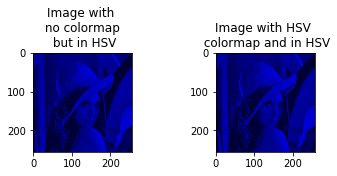

In [7]:
from skimage.color import rgb2hsv, gray2rgb
img_hsv = []
for img in img_array:
    img_hsv.append(rgb2hsv(gray2rgb(img)))
    
for counter, img in  enumerate(img_hsv):
    width = np.shape(img)[1]
    height = np.shape(img)[0]
    aspect = width / float(height)
    print("Image %d size is: %s and aspect ratio is: %f" %(counter, np.shape(img), aspect))
    
f = plt.figure()
f.add_subplot(2,2,1)
plt.title('Image with \n no colormap \n but in HSV')
plt.imshow(img_hsv[2])
f.add_subplot(2,2,2)
plt.title('Image with HSV \n colormap and in HSV')
plt.imshow(img_hsv[2], cmap='hsv')

### Without conversion
Here only the colormap is changed

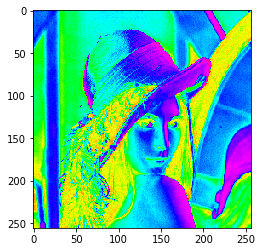

In [8]:
plt.imshow(img_array[2], cmap='hsv')


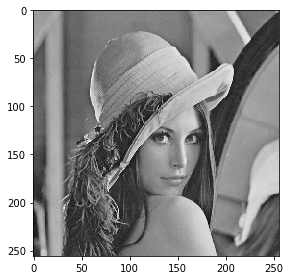

/home/machinelearning/anaconda3/envs/MachineLearning/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


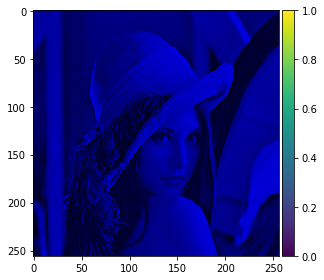

In [9]:
from skimage.io import imshow, show
 
imshow(img_array[2],'matplotlib')
show()
imshow(img_hsv[2],'matplotlib')
show()


# The Lena Case
The downloaded image is not single channel

Image type:  (221, 240, 3)


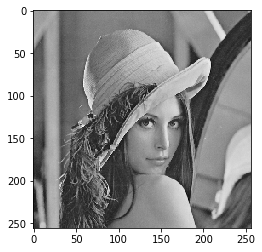

In [10]:
img_lena = cv2.imread('./images/Lena-Gray.png')
print("Image type: ", np.shape(img))
plt.imshow(img_lena, cmap='hsv')

In [11]:
from skimage.color import rgb2gray
img_lena = rgb2gray(img_lena)
print(np.shape(img_lena))

(256, 256)


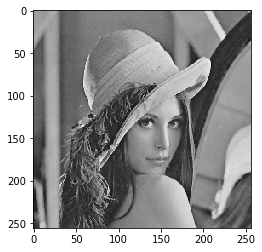

In [12]:
rgb_img = gray2rgb(img_lena)
# imsave("/home/akshay/lena_gray2color.png",rgb_img)
plt.imshow(rgb_img)

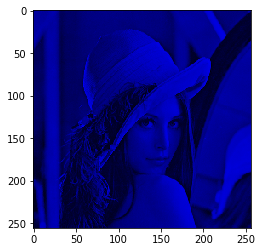

In [13]:
hsv_img = rgb2hsv(rgb_img)
plt.imshow(hsv_img, cmap='hsv')

## Not what I expected!
It seems that CMAP works with images in $M\times N \times 1$. So if I only read Lena as a gray image cmap will let me plot with different CMAPs. When the image is *3 channel* This won't work

Lena image is:  (256, 256)


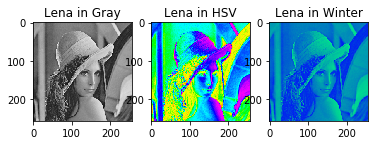

In [14]:
print('Lena image is: ', np.shape(img_lena))
f =plt.figure()
f.add_subplot(1,3,1)
plt.title('Lena in Gray')
plt.imshow(img_lena, cmap='gray')
f.add_subplot(1,3,2)
plt.title('Lena in HSV')
plt.imshow(img_lena, cmap='hsv')
f.add_subplot(1,3,3)
plt.title('Lena in Winter')
plt.imshow(img_lena, cmap='winter')

## Saving Lena in HSV
Lena image must be single channel $M \times N \times 1$

In [15]:
plt.imsave('LenaHSV.jpg',img_lena, cmap='hsv')

Loading Lena HSV picture. Without using any color map in the imshow method, images seem to be in reversed color order.

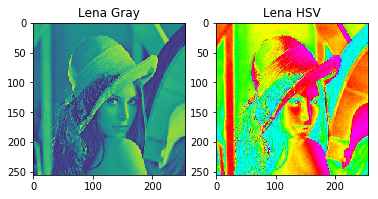

In [16]:
img_lena_hsv = cv2.imread('LenaHSV.jpg')
np.shape(img_lena_hsv)
f = plt.figure()
f.add_subplot(1,2,1)
plt.title('Lena Gray')
plt.imshow(img_lena)
f.add_subplot(1,2,2)
plt.title('Lena HSV')
plt.imshow(img_lena_hsv)



Using values in CMAP

Need to check how the conversion would go in openCV

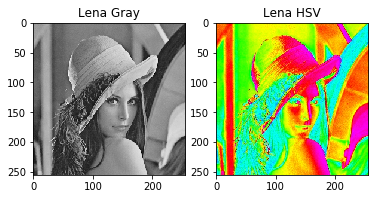

In [17]:
f = plt.figure()
f.add_subplot(1,2,1)
plt.title('Lena Gray')
plt.imshow(img_lena, cmap='gray')
f.add_subplot(1,2,2)
plt.title('Lena HSV')
plt.imshow(img_lena_hsv, cmap='gray')

If we wanted to split in several channels Lena Image

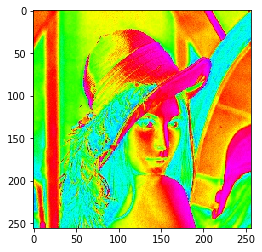

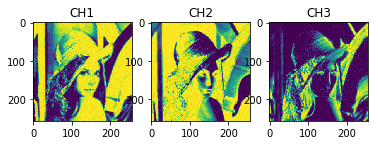

In [18]:
ch1, ch2, ch3 = cv2.split(img_lena_hsv)
plt.imshow(img_lena_hsv)
f = plt.figure()
f.add_subplot(1,3,1)
plt.title('CH1')
plt.imshow(ch1)
f.add_subplot(1,3,2)
plt.title('CH2')
plt.imshow(ch2)
f.add_subplot(1,3,3)
plt.title('CH3')
plt.imshow(ch3)


# OpenCV Color order
**Reference:**
https://www.pyimagesearch.com/2014/11/03/display-matplotlib-rgb-image/

OpenCV **imread** funtion reads images in reverse order. This Means **BGR**. A way to overcome this difficulty would be to use:

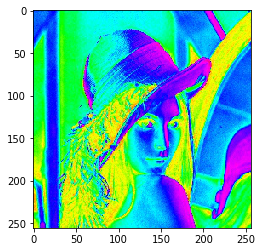

In [19]:
import matplotlib.image as mpimg
image = mpimg.imread('LenaHSV.jpg')
plt.imshow(image)

Another way by using OpenCV imread woudbe:

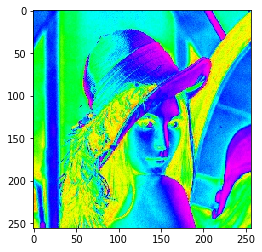

In [20]:
img_lena_hsv = cv2.imread('LenaHSV.jpg')
plt.imshow(cv2.cvtColor(img_lena_hsv, cv2.COLOR_BGR2RGB))

## What happens with cv2.COLOR_BGR2HSV?

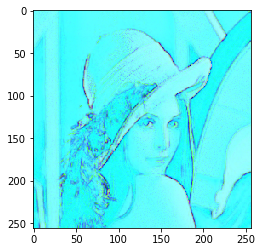

In [21]:
img_lena_hsv = cv2.imread('LenaHSV.jpg')
plt.imshow(cv2.cvtColor(img_lena_hsv, cv2.COLOR_BGR2HSV))

(256, 256)


error: OpenCV(3.4.1) /io/opencv/modules/imgproc/src/color.cpp:11109: error: (-215) depth == 0 || depth == 2 || depth == 5 in function cvtColor


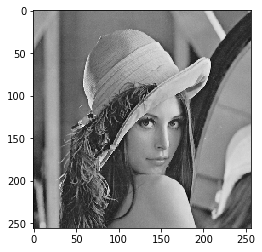

In [22]:
print(np.shape(img_lena))
plt.imshow(img_lena, cmap='gray')
rgb_img2 = cv2.cvtColor(img_lena, cv2.COLOR_GRAY2BGR)
# rgb_img2 = cv2.cvtColor(img_lena, cv2.COLOR_GRAY2BGR)
print(np.shape(rgb_img2))
hsv_img2 = cv2.cvtColor(rgb_img2, cv2.COLOR_BGR2HSV_FULL)
f = plt.figure()
f.add_subplot(2,2,1)
plt.title('Gray2RGB')
plt.imshow(rgb_img2)
f.add_subplot(2,2,2)
plt.title('RGB2HSV FULL')
plt.imshow(hsv_img2)

## Saving images in Colormap representation
Let us try to loop over the images and save them in HSV mapping

In [24]:
# from matplotlib import pyplot as cm
# from matplotlib import cm
# print(cm.cmaps_listed)
plt.imsave("hola2",img_array[2], cmap='hsv')
plt.imsave('./images/hsv_roi3.jpg', img_array[3], cmap='hsv')

In [ ]:
img_hsv_read = cv2.imread('hola2.png')
print(np.shape(img_hsv_read))
plt.imshow(img_hsv_read)

In [ ]:
img_canal = img_hsv_read[:,:,1]
print(np.shape(img_canal))
plt.imshow(img_canal)

In [ ]:
from skimage.io import imread, imshow
roi_hsvcm = imread('hola2.png')
imshow(roi_hsvcm)
np.shape(roi_hsvcm)


In [ ]:
from skimage.color import rgba2rgb
roi_hsvcm2 = rgba2rgb(roi_hsvcm)
imshow(roi_hsvcm2)
np.shape(roi_hsvcm2)

In [ ]:
ch0, ch1, ch2 = roi_hsvcm2[:,:,0],roi_hsvcm2[:,:,1],roi_hsvcm2[:,:,2]
f = plt.figure()
f.add_subplot(1,3,1)
plt.imshow(ch0, cmap='gray')
plt.title('ch0')
f.add_subplot(1,3,2)
plt.imshow(ch1, cmap='gray')
plt.title('ch1')
f.add_subplot(1,3,3)
plt.imshow(ch2, )
plt.title('ch2')


In [ ]:
imshow(ch1)

# Skimage
Trying to do the same but only with skimage library
https://scikit-image.org/docs/dev/user_guide/transforming_image_data.html

In [ ]:
from skimage.io import imread, imsave, imshow
img_lenaSk = imread('./images/Lena-Gray.png')
print(np.shape(img_lenaSk))
imshow(img_lenaSk)

In [ ]:
from skimage.color import grey2rgb, rgb2hsv
lena_rgb = grey2rgb(img_lenaSk)
print(np.shape(lena_rgb))
imshow(lena_rgb)

In [ ]:
lena_hsv = rgb2hsv(lena_rgb)
imshow(lena_hsv)

In [ ]:
plt.imshow(img_lenaSk, cmap='hsv')

In [ ]:
iread = imread('LenaHSV.jpg')
imshow(iread)
np.shape(iread)

## Tinting gray Images
https://scikit-image.org/docs/dev/auto_examples/color_exposure/plot_tinting_grayscale_images.html#sphx-glr-auto-examples-color-exposure-plot-tinting-grayscale-images-py


In [ ]:
import matplotlib.pyplot as plt
from skimage import data
from skimage import color
from skimage import img_as_float

grayscale_image = img_as_float(imread('./images/2.png')[::2, ::2])
image = color.gray2rgb(grayscale_image)

red_multiplier = [1, 0, 0]
yellow_multiplier = [1, 1, 0]
green_multiplier = [0,1,0]

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(8, 4),
                               sharex=True, sharey=True)
ax1.imshow(red_multiplier * image)
ax2.imshow(yellow_multiplier * image)
ax3.imshow(green_multiplier*image)

In [ ]:
imshow(rgb2hsv(image))

In [ ]:
def colorize(image, hue, saturation=1):
    """ Add color of the given hue to an RGB image.

    By default, set the saturation to 1 so that the colors pop!
    """
    hsv = color.rgb2hsv(image)
    hsv[:, :, 1] = saturation
    hsv[:, :, 0] = hue
    return color.hsv2rgb(hsv)

hue_rotations = np.linspace(0, 1, 6)

fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True)

for ax, hue in zip(axes.flat, hue_rotations):
    # Turn down the saturation to give it that vintage look.
    tinted_image = colorize(image, hue, saturation=0.3)
    ax.imshow(tinted_image, vmin=0, vmax=1)
    ax.set_axis_off()
fig.tight_layout()